## Loading toolboxes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading data

In [2]:
data = pd.read_csv('logon_info.csv')
print(                                                                                                                )
print("A view of data-------------------------------------------------------------------------------------------------")
print(data.head())
print("--------------------------------------------------------------------------------------------------------------")
print("Summary of the data-------------------------------------------------------------------------------------------")
print(data.describe(include = 'all'))
print("--------------------------------------------------------------------------------------------------------------")
print("Number of missed data-----------------------------------------------------------------------------------------")
print(data.isnull().sum())
print("--------------------------------------------------------------------------------------------------------------")
print("--------------------------------------------------------------------------------------------------------------")
print("Data types----------------------------------------------------------------------------------------------------")
print(data.dtypes)
print("--------------------------------------------------------------------------------------------------------------")


A view of data-------------------------------------------------------------------------------------------------
                         id                 date          user       pc  \
0  {Y6O4-A7KC67IN-0899AOZK}  01/04/2010 00:10:37  ACME/KEE0997  PC-1914   
1  {O5Y6-O7CJ02JC-6704RWBS}  01/04/2010 00:52:16  ACME/KEE0997  PC-1914   
2  {D2D1-C6EB14QJ-2100RSZO}  01/04/2010 01:17:20  ACME/KEE0997  PC-3363   
3  {H9W1-X0MC70BT-6065RPAT}  01/04/2010 01:28:34  ACME/KEE0997  PC-3363   
4  {H3H4-S5AZ00AZ-9560IYHC}  01/04/2010 01:57:30  ACME/BJM0992  PC-3058   

  activity  
0    Logon  
1   Logoff  
2    Logon  
3   Logoff  
4    Logon  
--------------------------------------------------------------------------------------------------------------
Summary of the data-------------------------------------------------------------------------------------------
                              id                 date          user       pc  \
count                     849579               849579   

Decomposing the data column
Decomposing the time column by converting its data type to the *datetime* in *pandas*

In [3]:
data.date = pd.to_datetime(data.date)

data.dtypes

id                  object
date        datetime64[ns]
user                object
pc                  object
activity            object
dtype: object

Sepearting the the time in diiferent units

In [4]:
year = data.date.dt.year
data['year'] = year 
#----------------------------------------------------------------------------------------------------------------------

month = data.date.dt.month
data['month'] = month
#----------------------------------------------------------------------------------------------------------------------

week = data.date.dt.week
data['week'] = week
#----------------------------------------------------------------------------------------------------------------------

weekday = data.date.dt.weekday
data['weekday'] = weekday 
#----------------------------------------------------------------------------------------------------------------------

time = data.date.dt.time

Time = []
for i in time:
    d = str(i).replace(':', "")
    Time.append(np.array(d))

data["time"] = Time
#----------------------------------------------------------------------------------------------------------------------

DATE = data.date.dt.date
DATE

ddate = []
for i in DATE:
    d = str(i).replace('-', "")
    ddate.append(np.array(d))

np.array(ddate)
data['numdate'] = ddate

print(                                                                                                                )
print("New data frame------------------------------------------------------------------------------------------------")
print(data.head())
print("--------------------------------------------------------------------------------------------------------------")



New data frame------------------------------------------------------------------------------------------------
                         id                date          user       pc  \
0  {Y6O4-A7KC67IN-0899AOZK} 2010-01-04 00:10:37  ACME/KEE0997  PC-1914   
1  {O5Y6-O7CJ02JC-6704RWBS} 2010-01-04 00:52:16  ACME/KEE0997  PC-1914   
2  {D2D1-C6EB14QJ-2100RSZO} 2010-01-04 01:17:20  ACME/KEE0997  PC-3363   
3  {H9W1-X0MC70BT-6065RPAT} 2010-01-04 01:28:34  ACME/KEE0997  PC-3363   
4  {H3H4-S5AZ00AZ-9560IYHC} 2010-01-04 01:57:30  ACME/BJM0992  PC-3058   

  activity  year  month  week  weekday    time   numdate  
0    Logon  2010      1     1        0  001037  20100104  
1   Logoff  2010      1     1        0  005216  20100104  
2    Logon  2010      1     1        0  011720  20100104  
3   Logoff  2010      1     1        0  012834  20100104  
4    Logon  2010      1     1        0  015730  20100104  
-----------------------------------------------------------------------------------------

Turn the pc number into the integer

In [5]:
pc = []
for i in data['pc']:
    d = str(i).split("-")
    pc.append(np.array(d[1]))

data["PC"] = pc

print(                                                                                                                )
print("New data frame------------------------------------------------------------------------------------------------")
print(data.head())
print("--------------------------------------------------------------------------------------------------------------")


New data frame------------------------------------------------------------------------------------------------
                         id                date          user       pc  \
0  {Y6O4-A7KC67IN-0899AOZK} 2010-01-04 00:10:37  ACME/KEE0997  PC-1914   
1  {O5Y6-O7CJ02JC-6704RWBS} 2010-01-04 00:52:16  ACME/KEE0997  PC-1914   
2  {D2D1-C6EB14QJ-2100RSZO} 2010-01-04 01:17:20  ACME/KEE0997  PC-3363   
3  {H9W1-X0MC70BT-6065RPAT} 2010-01-04 01:28:34  ACME/KEE0997  PC-3363   
4  {H3H4-S5AZ00AZ-9560IYHC} 2010-01-04 01:57:30  ACME/BJM0992  PC-3058   

  activity  year  month  week  weekday    time   numdate    PC  
0    Logon  2010      1     1        0  001037  20100104  1914  
1   Logoff  2010      1     1        0  005216  20100104  1914  
2    Logon  2010      1     1        0  011720  20100104  3363  
3   Logoff  2010      1     1        0  012834  20100104  3363  
4    Logon  2010      1     1        0  015730  20100104  3058  
-----------------------------------------------------

Categorizing *user* and *activty*

In [6]:
data['user_cat'] = pd.Categorical(data.user)
#data['usercat'] = data['user'].astype('category',ordered=False)
data['user_cat'] = data['user_cat'].cat.codes

data['actvi_cat'] = pd.Categorical(data.activity)
data['actvi_cat'] = data['actvi_cat'].cat.codes

print(                                                                                                                )
print("New data frame------------------------------------------------------------------------------------------------")
print(data.head())
print("--------------------------------------------------------------------------------------------------------------")

print(data.dtypes)


New data frame------------------------------------------------------------------------------------------------
                         id                date          user       pc  \
0  {Y6O4-A7KC67IN-0899AOZK} 2010-01-04 00:10:37  ACME/KEE0997  PC-1914   
1  {O5Y6-O7CJ02JC-6704RWBS} 2010-01-04 00:52:16  ACME/KEE0997  PC-1914   
2  {D2D1-C6EB14QJ-2100RSZO} 2010-01-04 01:17:20  ACME/KEE0997  PC-3363   
3  {H9W1-X0MC70BT-6065RPAT} 2010-01-04 01:28:34  ACME/KEE0997  PC-3363   
4  {H3H4-S5AZ00AZ-9560IYHC} 2010-01-04 01:57:30  ACME/BJM0992  PC-3058   

  activity  year  month  week  weekday    time   numdate    PC  user_cat  \
0    Logon  2010      1     1        0  001037  20100104  1914       520   
1   Logoff  2010      1     1        0  005216  20100104  1914       520   
2    Logon  2010      1     1        0  011720  20100104  3363       520   
3   Logoff  2010      1     1        0  012834  20100104  3363       520   
4    Logon  2010      1     1        0  015730  20100104  3058 

Seperating data

In [10]:
#data["time"] = pd.Series.as_matrix(data["time"])
#data["time"] = np.array(np.dtype(np.int64))
data["numdate"] = data["numdate"].astype("str")
data["numdate"] = data["numdate"].astype("int")

data["time"] = data["time"].astype("str")
data["time"] = data["time"].astype("int")

data["PC"] = data["PC"].astype("str")
data["PC"] = data["PC"].astype("int")


log_on_ARASH = data.iloc[:,5:]

log_on_ARASH.head()

,year,month,week,weekday,time,numdate,PC,user_cat,actvi_cat
0,2010,1,1,0,1037,20100104,1914,520,1
1,2010,1,1,0,5216,20100104,1914,520,0
2,2010,1,1,0,11720,20100104,3363,520,1
3,2010,1,1,0,12834,20100104,3363,520,0
4,2010,1,1,0,15730,20100104,3058,138,1


Correlation matrix

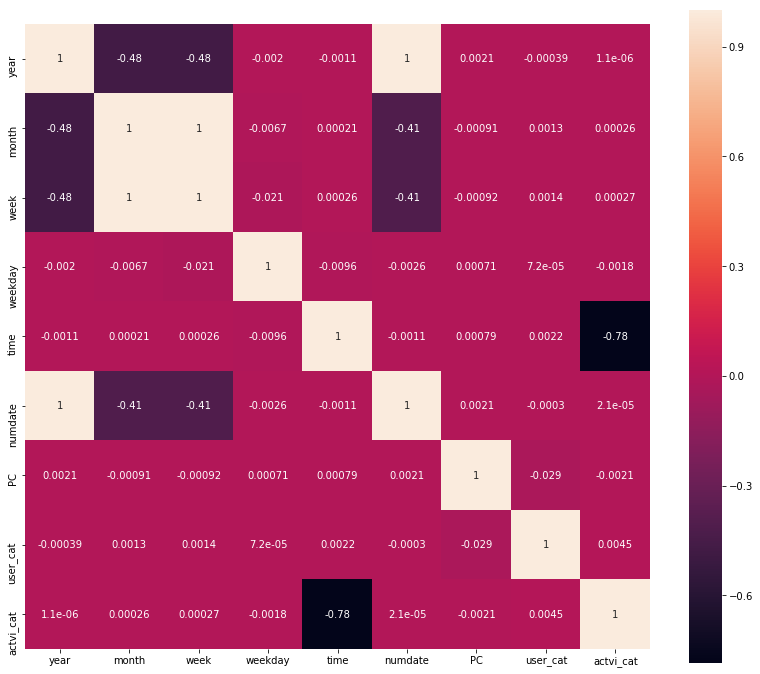

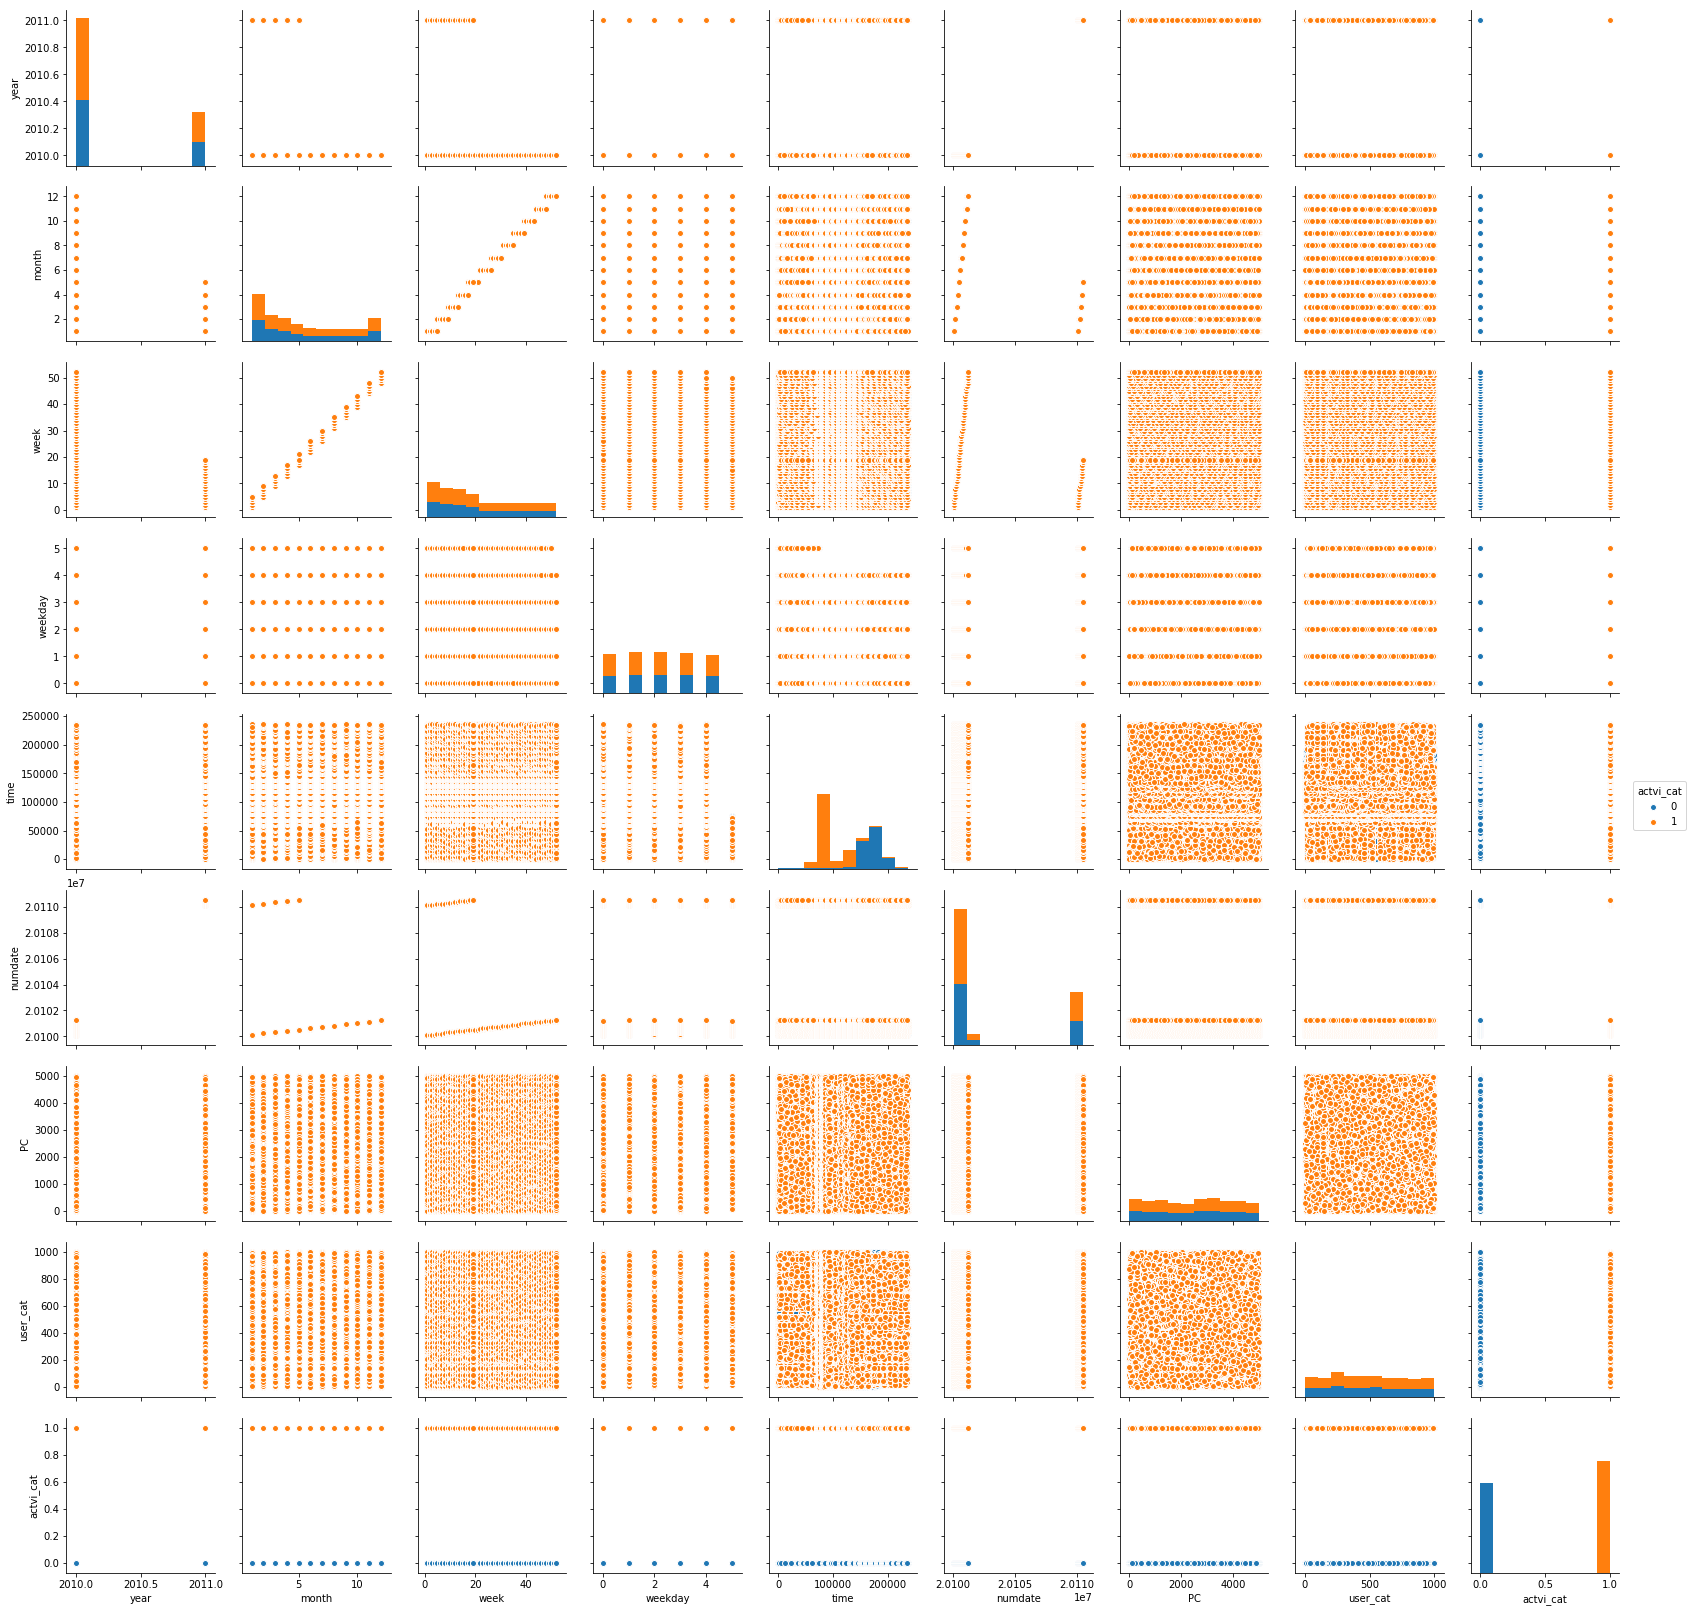

In [11]:
%matplotlib inline
plt.figure(figsize=(14,12))
sns.heatmap(log_on_ARASH.corr(), square=True, annot=True)

plt.figure(figsize=(14,12))
sns.pairplot(log_on_ARASH, hue = "actvi_cat")


In [9]:
log_on_ARASH.to_csv('log_on_ARASH.csv',index=False)